### Making plots of gene expression from RNAseq DeSEQ2 csv files

In [76]:
import numpy as np
import pandas as pd
import math
import IPython
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import importlib
import svgutils 
from svgutils.compose import *
#import svgwrite

def svgreload():
    !osascript -e 'tell application "Google Chrome" to tell the active tab of second window to reload'

In [86]:
def log2(m):
    if m>0:
        return np.log2(m)
    else:
        return 0
    
def log2series(m):
    tempseries=m
    for i in range(0,len(tempseries)):
        tempseries[i]=log2(tempseries[i])
    return tempseries

def approx(n):
    return round(n*100)/100

def findgene(genename):
    !head -1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv > ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv >> ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/CSV/temp.txt")
    return gdf

def findgenelist(genename):
    !head -1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv > ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv >> ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/CSV/temp.txt")
    return gdf

def formatBars(plotH):
    bars = plotH.get_children()
    for i in range(0,len(bars)):
        if i < 4:
            bars[i].set_facecolor('#B400FF')
        else:
            bars[i].set_facecolor('#3232FF')

def formatFigure_Opsins(genename, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    # axH.set_xticks(n)
    # axH.set_xticklabels(gdf.iloc[0,h_start:h_end].index);
    axH.set_xticks([2.5,7])
    axH.set_xticklabels(['UV','S']);
    
    axH.set_yticks(np.arange(0, 2.5, step=0.5))
    # axH.set_yticklabels([str(i) + ' x 10$^6$' for i in np.arange(0, 2.5, step=0.5)]);
    axH.set_ylabel('norm. counts x 10$^6$', fontproperties=fontLabels)
    
    axH.set_title(genename, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    
#     formatBars(plotH)

def formatFigure_right(genename, figH, axH, plotH):
    formatFigure(genename, figH, axH, plotH)
    axH.set_ylabel('')
    

def formatFigure(genename, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    axH.set_xticks([2.5,7])
    axH.set_xticklabels(['UV','S']);
    axH.ticklabel_format(style='sci',axis='y',scilimits=(0,2))
    axH.set_ylabel('norm. counts', fontproperties=fontLabels)
    axH.set_title(genename, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.tick_params(axis = 'both', which = 'major', labelsize = 18)
    axH.yaxis.offsetText.set_fontsize(18)

def formatFigure_list(genelist, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    xTicks = []
    xLabels = []
    for i in range(len(genelist)):
        xTicks = np.append(xTicks, [2.5+(10*i),7+(10*i)])
        xLabels = np.append(xLabels, ['UV','S'])
    axH.set_xticks(xTicks)
    axH.set_xticklabels(xLabels);
    axH.ticklabel_format(style='sci',axis='y',scilimits=(0,2))
    axH.set_ylabel('norm. counts', fontproperties=fontLabels)
    axH.set_title(genelist, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.tick_params(axis = 'both', which = 'major', labelsize = 18)
    ax.yaxis.offsetText.set_fontsize(18)
    

def plotBars(genename):
    gdf = findgene(genename)
    n = np.arange(1,5)
    n = np.append(n, 4.5 + np.arange(1,5))
    h_start = 7
    h_end = 15
    h = gdf.iloc[0,h_start:h_end]
    return n, h

def plotBars_list(genelist):
    n=[]
    h=[]
    for i,gene in enumerate(genelist, start=0):
        tempn, temph = plotBars(gene)
        n = np.append(n,tempn+(10*i))
        h = np.append(h,temph)
    return n, h

### Good example for opsins with nice format

In [ ]:
cd '~/Dropbox/LiLab/RNAseq/genePlots/combos'

In [ ]:
genename = 'opn1sw1'
n,h = plotBars(genename)
h = h / 1e6
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure_Opsins(genename, fH, ax, pH)
# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

### Generic one (automatic y labels)

In [88]:
gdf = findgenelist('chn')
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,UV01,UV02,UV03,UV04,S01,S02,S03,S04,chr-rank
0,chn1,chimerin 1,353.66,-0.1168,0.9424,0.743021,0.999194,0,0,292,762,4,613,927,232,27560
1,chn2,chimerin 2,144.95,-0.5474,1.2608,0.000087,0.005498,0,0,0,0,0,318,98,744,27559


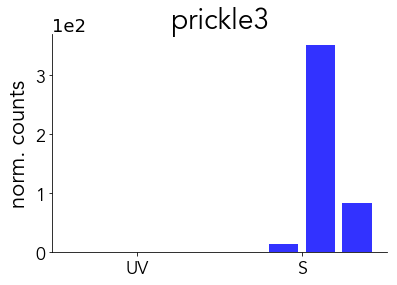

In [175]:
genename = 'prickle3'
n,h = plotBars(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure(genename, fH, ax, pH)
plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

### Plot several genes in a single plot

In [31]:
cd '~/Dropbox/LiLab/RNAseq/genePlots/combos'

/Users/angueyra/Dropbox/LiLab/RNAseq/genePlots/combos


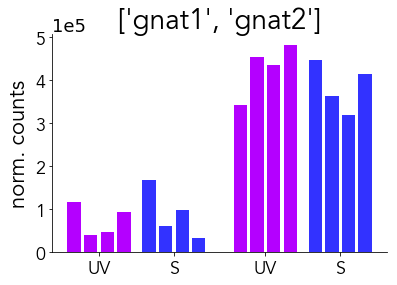

In [150]:
genelist = ['gnat1','gnat2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure_list(genelist, fH, ax, pH)
# plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

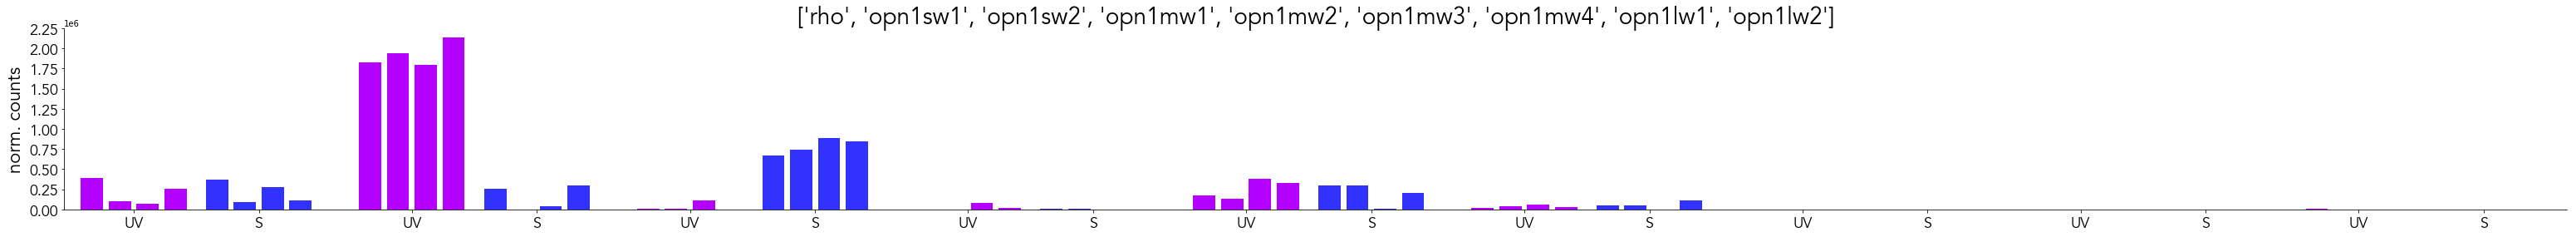

In [24]:
genelist = ['rho','opn1sw1','opn1sw2','opn1mw1','opn1mw2','opn1mw3','opn1mw4','opn1lw1','opn1lw2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots(figsize=[6*len(genelist),4])
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure_list(genelist, fH, ax, pH)
plt.xlim(0,len(genelist)*10)
plt.savefig("{0}.svg".format('opn1'), transparent=True, format="svg")

### Proper (and easier) way to do multiple genes is to actually use the subplots

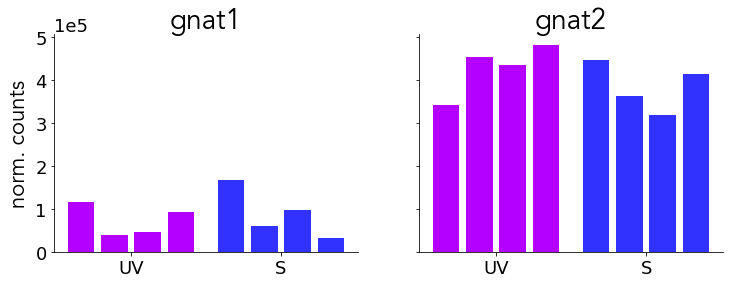

In [49]:
genelist = ['gnat1','gnat2']
fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i]) 
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

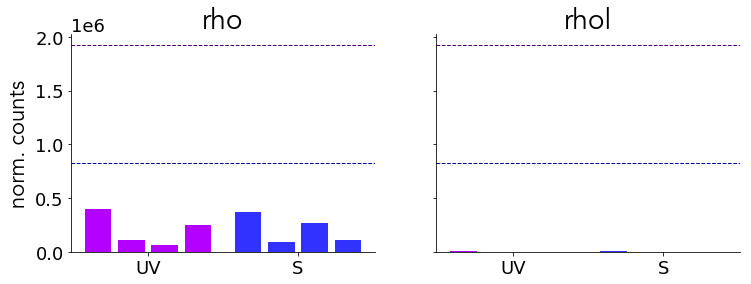

In [75]:
genelist = ['rho','rhol']
UVline = 1925829.5;
Sline = 824782.34;

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    uvlH = plt.axhline(y=UVline,linewidth=1, linestyle="--", color='#520075', zorder=-1)
    slH = plt.axhline(y=Sline,linewidth=1, linestyle="--", color='#000094', zorder=-1)
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('rho'), transparent=True, format="svg")


In [85]:
# Using svgutils to automatically tile these figures the right way
Figure("2400", "2000",
       SVG("opn1sw.svg").move(0, 290*0),
       SVG("rho.svg").move(0, 290*1),
       SVG("opn1mw.svg").move(-110, 290*2),
       SVG("opn1lw.svg").move(0, 290*3)
        ).save("OpsinsAll.svg")
svgreload()

### Phototransduction

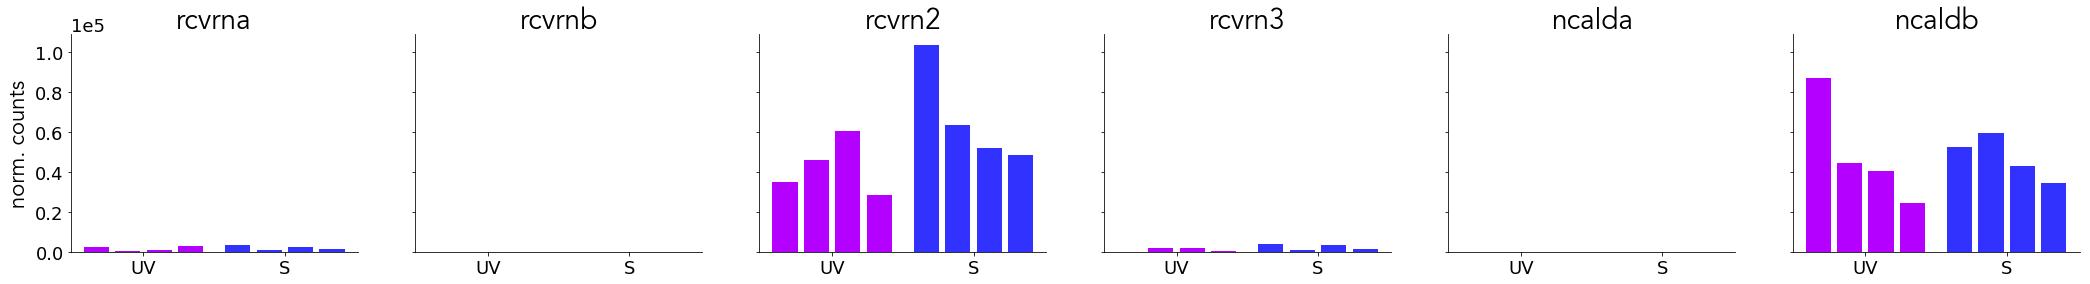

In [172]:
# genelist = ['saga','sagb','arr3a','arr3b']
# plotName = 'arrestins'

# genelist = ['gngt1','gngt2a','gngt2b']
# plotName = 'gngt'

# genelist = ['gnb1a','gnb1b','gnb3a','gnb3b','gnb5b']
# plotName = 'gnb'

# genelist = ['pde6a','pde6b','pde6d','pde6ga','pde6gb','pde6c','pde6ha']
# plotName = 'pde'

# genelist = ['gucy2d','gucy2f']
# plotName = 'GC'

# genelist = ['guca1a','guca1b','guca1c','guca1d','guca1e','guca1g']
# plotName = 'GCAP'

# genelist = ['cnga1a','cnga1b','cnga3a','cnga3b']
# plotName = 'CNGalpha'

# genelist = ['cngb1a','cngb3.1','cngb3.2']
# plotName = 'CNGbeta'

# genelist = ['cngb1a','cngb3.1','cngb3.2']
# plotName = 'CNGbeta'

# genelist = ['rgs9a','rgs9b','rgs9bp',
#             'rgs3a','rgs6',
#             'rgs11','rgs12a','rgs16','rgs20']
# plotName = 'RGS'

# genelist = ['grk1a','grk1b',
#             'grk3',
#             'grk4','grk5','grk5l',
#             'grk6',
#             'grk7a','grk7b']
# plotName = 'GRK'

genelist = ['rcvrna','rcvrnb','rcvrn2','rcvrn3','ncalda','ncaldb']
plotName = 'rcvrn'

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

### Others

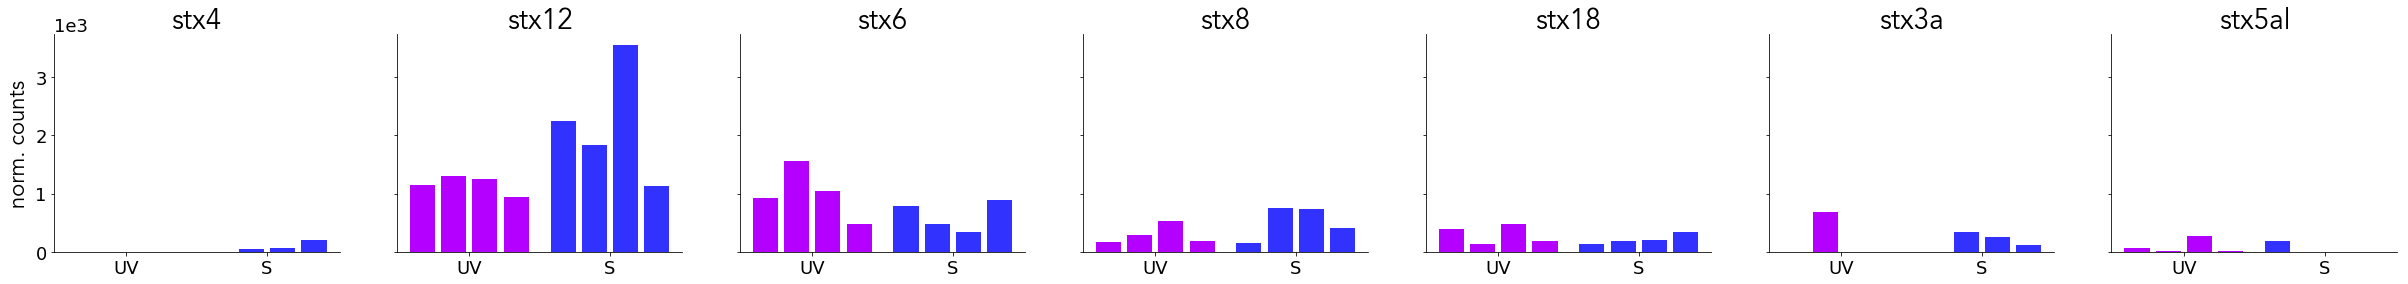

In [168]:
# genelist = ['ctbp1','ctbp2a']
# plotName = 'ctbp'

# genelist = ['cadm1a','cadm1b','cadm2a','cadm2b','cadm3','cadm4']
# plotName = 'cadm'

# genelist = ['tjp1a','tjp1b','tjp2a','tjp2b','tjp3']
# plotName = 'tjp'

# genelist = ['nrxn1a','nrxn1b','nrxn2a','nrxn2b','nrxn3a','nrxn3b',]
# plotName = 'nrxn'

# genelist = ['eml1','eml2','eml3','eml5']
# plotName = 'eml'

# genelist = ['cpne1','cpne2','cpne3','cpne4a','cpne4b','cpne5a','cpne5b','cpne7','cpne8','cpne9']
# plotName = 'cpne'

# genelist = ['tbx2a','tbx2b']
# plotName = 'tbx2'

# genelist = ['chn1','chn2']
# plotName = 'chn'

# genelist = ['ncdn','ncdn']
# plotName = 'ztest'

# genelist = ['sema7a','sema6a','sema6d','sema4ab','sema4ba','sema3fa','sema3fb']
# plotName = 'sema'

# genelist = ['cacna1aa','cacna1ab',
#             'cacna1da','cacna1db',
#             'cacna1fa','cacna1fb',
#             'cacna2d1a','cacna2d2a',
#             'cacna2d4a','cacna2d4b',
#             'cacna1sb',
#            ]
# plotName = 'CaV'

# genelist = ['stxbp1b','stxbp4','stxbp2','stxbp5a','stxbp5b','stxbp5l','stxbp3']
# plotName = 'stxBP'

genelist = ['stx4','stx12','stx6',
            'stx8','stx18',
            'stx3a','stx5al']
plotName = 'stx'

            
fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

In [174]:
gdf = findgenelist('prickle')
# gdf = gdf.sort_values(by=['baseMean'], ascending=False)
# gdf['symbol']
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,UV01,UV02,UV03,UV04,S01,S02,S03,S04,chr-rank
0,prickle1a,prickle homolog 1a,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,23803
1,prickle1b,prickle homolog 1b,2.89,0.2923,1.0791,0.127760,NaN,23,0,0,0,0,0,0,0,23802
2,prickle2a,prickle homolog 2a,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,13183
3,prickle2b,prickle homolog 2b,35.13,0.3393,1.1057,0.007220,0.132227,0,0,185,96,0,0,0,0,13182
4,prickle3,prickle homolog 3,55.77,-0.5278,1.2415,0.000734,0.026801,0,0,0,0,0,13,351,82,28271


### According to Neuhauss recoverin1a in enriched in rods and UV-cones

In [61]:
n

array([1. , 2. , 3. , 4. , 5.5, 6.5, 7.5, 8.5])